### Metrics TR-MSE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import tr_mse_fit, tr_mse
from os import listdir
from PIL import Image

Using TensorFlow backend.


In [2]:
dataset_path = '../data/sand'
trend_num = 3
r = 3

In [3]:
train_mse, val_mse, tmse, vmse = tr_mse_fit(dataset_path, 3, 3)

Train dataset:   0%|          | 1/3325 [00:00<08:51,  6.26it/s]

Found 3325 train samples
Found 175 validation samples


Validation dataset: 100%|██████████| 175/175 [00:14<00:00, 11.85it/s]

Dir already exist
Metrics saved successfully.


In [2]:
tmse = np.load('../data/sand/trend3/metrics/tmse.npy')
vmse = np.load('../data/sand/trend3/metrics/vmse.npy')

In [5]:
nn_out_list = listdir('trained_models/sand/trend2/nf32/nn_output')
N = len(nn_out_list)
r = 3
nn_nf32 = np.zeros(251)
err_nf32 = 0
err_arr_nf32 = np.zeros(251)
for file in tqdm_notebook(nn_out_list, desc='NN output'):
    image = Image.open('trained_models/sand/trend2/nf32/nn_output/' + file)
    error, error_arr, metric = tr_mse(image, tmse, r)
    nn_nf32 += metric
    err_arr_nf32 += error_arr
    err_nf32 += error
nn_nf32 /= N
err_arr_nf32 /= N
err_nf32 /= N

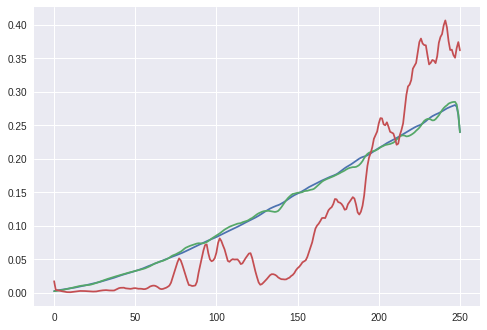

In [11]:
plt.plot(tmse)
plt.plot(nn_nf32)

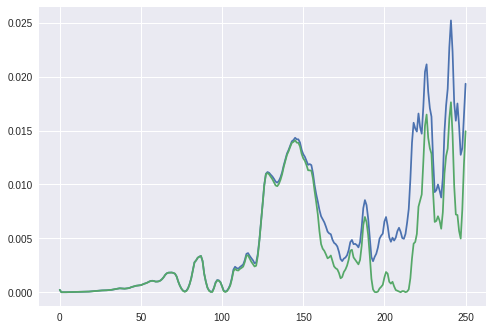

In [10]:
plt.plot(err_arr_nf32)
plt.plot((nn_nf32 - tmse)**2)

In [8]:
err_nf32

0.0054887447323557631